Source of Data :
https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/data

In [ ]:
# Mounting google drive ke google colabs #
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/DIBIMBING - DATA SCIENCE/Day 16 - Regularized Regression in Python

/content/drive/MyDrive/DIBIMBING - DATA SCIENCE/Day 16 - Regularized Regression in Python


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Datasets

In [ ]:
# Read file csv #
df = pd.read_csv('boston.csv')

In [ ]:
# first 5 rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Keterangan :

*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per $10,000
*   PTRATIO - pupil- teacher ratio by town

*   B-1000 (Bk - 0.63)**2 where Bk is the proportion of blacks by town
*   LSTAT - percentage of lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's




> **Target = MEDV because another variables can impact the MEDV**







# 1. Split data: train - validate - test

## Preparing pretrain data and test data (80% vs 20% )

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

feature_medv_pretrain, feature_medv_test, target_medv_pretrain, target_medv_test = train_test_split(feature, target, test_size=0.20, random_state=42)

## Preparing train data and validate data (80% vs 20%)

In [ ]:
feature_medv_train, feature_medv_validate, target_medv_train, target_medv_validate = train_test_split(feature_medv_pretrain, target_medv_pretrain, test_size=0.20, random_state=42)

# 2. Draw correlation plot on training data and perform feature selection on highly correlated features

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


From the VIF score we know that variables below has moderate multicolinearity :
*   nox
*   dis
*   rad
*   tax





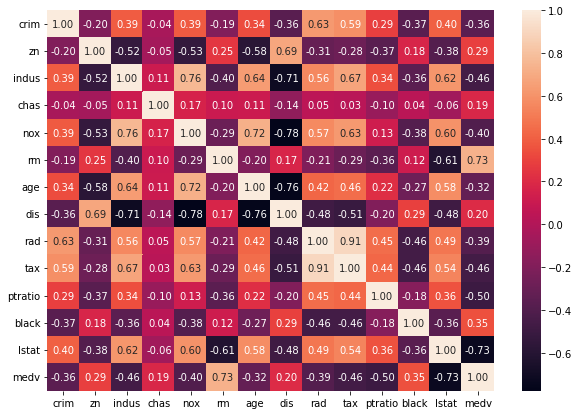

In [ ]:
# heatmap correlation
medv_train = pd.concat([feature_medv_train, target_medv_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

From the heatmap, we know that rad and tax has significant correlation, therefore we drop 'rad' because has the small correlation with medv (-0,39) than tax with medv (-0,46)

In [ ]:
# drop redundant features
feature_medv_train = feature_medv_train.drop(columns=['rad'])
feature_medv_validate = feature_medv_validate.drop(columns=['rad'])
feature_medv_test = feature_medv_test.drop(columns=['rad'])

### Recheck VIF

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_medv_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.615076
2,zn,2.415036
3,indus,3.500250
4,chas,1.097962
5,nox,4.552308
6,rm,1.923266
7,age,3.119817
8,dis,4.390362
9,tax,3.191363
10,ptratio,1.804558


From the VIF score we know that variables below has moderate multicolinearity :
*   nox
*   dis





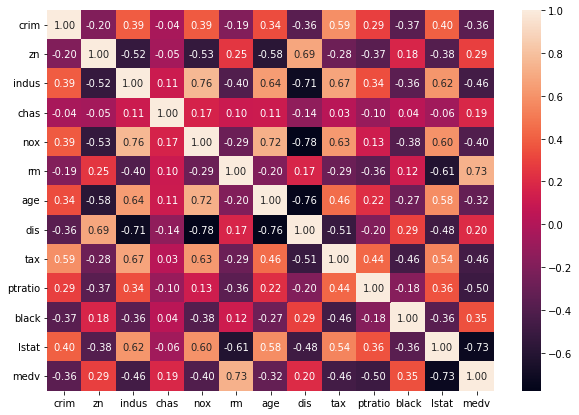

In [ ]:
# heatmap correlation
medv_train = pd.concat([feature_medv_train, target_medv_train], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

From heatmap, we know that there's no significant correlation between variables, which is good. Therefore, can continue to anothe step.


#3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10])

## a. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
ridge_reg = Ridge(alpha=0.1, 
                  random_state=42)

ridge_reg.fit(X_medv_train, y_medv_train)

Ridge(alpha=0.1, random_state=42)

In [ ]:
# retrieve the coefficients

data = feature_medv_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,21.691058
1,crim,-0.076335
2,zn,0.026267
3,indus,-0.011401
4,chas,3.238613
5,nox,-16.227923
6,rm,5.174160
7,age,-0.005854
8,dis,-1.483599
9,tax,0.000488


From the result, we know that if lambda = 0,1 will result model as below 

`MEDV = 21.691058 - 0.076335 CRIM + 0.026267 ZN - 0.011401 INDUS + 3.238613 CHAS -16.227923 NOX + 5.174160 RM - 0.005854 AGE - 1.483599 DIS + 0.000488 TAX - 0.846129 PTRATIO + 0.012019 BLACK - 0.453262 ISTAT`

From the model, we know that if 1% crime rate in town increase (constant for another variables), will reducing 0.076335 value of owner-occupied homes.


## b. Lasso

In [ ]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=0.1, 
                  random_state=42)

lasso_reg.fit(X_medv_train, y_medv_train)

Lasso(alpha=0.1, random_state=42)

In [ ]:
# retrieve the coefficients

data = feature_medv_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,11.590531
1,crim,-0.069246
2,zn,0.031882
3,indus,-0.053586
4,chas,1.297664
5,nox,-0.000000
6,rm,5.033031
7,age,-0.012249
8,dis,-1.173145
9,tax,-0.002510


From the result, we know that if lambda = 0,1 will result model as below 

`MEDV = 11.590531 - 0.069246 CRIM + 0.031882 ZN - 0.053586 INDUS + 1.297664 CHAS + 5.033031 RM - 0.012249 AGE - 1.173145 DIS - 0.002510 TAX - 0.663876 PTRATIO + 0.013118 BLACK - 0.515851 ISTAT`

From the model, we know that if 1% crime rate in town increase (constant for another variables), will reducing 0.069246 value of owner-occupied homes.


# 4. Choose the best lambda from the validation set

## Ridge

### Train Multiple Models

With train data set

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_medv_train, y_medv_train)
ridge_reg_pointone.fit(X_medv_train, y_medv_train)
ridge_reg_one.fit(X_medv_train, y_medv_train)
ridge_reg_ten.fit(X_medv_train, y_medv_train)

Ridge(alpha=10, random_state=42)

From the result, we know that the best lambda/alpha of ridge is 10

#### Check with multiple lambda in Validation set data

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_validate = feature_medv_validate.to_numpy()
y_medv_validate = target_medv_validate.to_numpy()
y_medv_validate = y_medv_validate.reshape(len(y_medv_validate),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validate)
    rmse = np.sqrt(mean_squared_error(y_medv_validate,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957843
RMSE of Ridge regression model with alpha = 0.1 is 4.949412535122791
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579991
RMSE of Ridge regression model with alpha = 10 is 4.871717983886228


After checking with multiple lambda in validation set data, we found out that alpha/lambda = 10 is the best of ridge (which the same with the lambda of train data) with have residuals from regression line to data arount 4.871717983886228 (the lowest RSME)

### Model Evaluation

In [ ]:
ridge_best = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.704380
1,crim,-0.076888
2,zn,0.025720
3,indus,-0.006177
4,chas,3.293082
5,nox,-17.692904
6,rm,5.169093
7,age,-0.004816
8,dis,-1.506422
9,tax,0.000758


From the result, we know that if lambda = 10 (the best lambda based on RMSE) will result model as below 

`MEDV = 22.704380 - 0.076888 CRIM + 0.025720 ZN - 0.006177 INDUS + 3.293082 CHAS - 17.692904 NOX + 5.169093 RM - -0.004816 AGE - 1.506422 DIS + 0.000758 TAX - 0.863661 PTRATIO + 0.011925 BLACK - 0.449930 ISTAT`

From the model, we know that if 1% crime rate in town increase (constant for another variables), will reducing 0.076888 value of owner-occupied homes.


In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train)))

R-squared for training data is 0.758958010752501


From the result, we know that 75,89% of variables can explain the value of medv (dependent variables). And, another 24,11% explain by others variables.

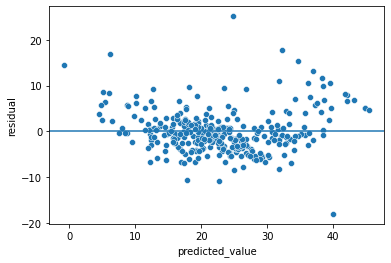

In [ ]:
# calculate residuals
residual = y_medv_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

1. linear relationship ? No because there's no linear line
2. variance konstan ? No because there's variety of residuals
3. residual independen ? No because there's no correlation

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_medv_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train)))

RMSE for training data is 4.679045708612578
MAE for training data is 3.3461317570037563
MAPE for training data is 0.16677645272182412


From the result, we know that train data :

*   the spread of residuals from regression line is 4.679045708612578
*   mean absolute error of actual data to regression line is 3.3461317570037563
*   percentage of mean absolute error of actual data to regression line is 16,677%, which is good.





## Lasso

### Train Multiple Models

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_medv_train = feature_medv_train.to_numpy()
y_medv_train = target_medv_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
Lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
Lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
Lasso_reg_one = Lasso(alpha=1, random_state=42)
Lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
Lasso_reg_pointzeroone.fit(X_medv_train, y_medv_train)
Lasso_reg_pointone.fit(X_medv_train, y_medv_train)
Lasso_reg_one.fit(X_medv_train, y_medv_train)
Lasso_reg_ten.fit(X_medv_train, y_medv_train)

Lasso(alpha=10, random_state=42)

From the result, we know that the best lambda/alpha of lasso is 10

#### Check with multiple lambda in Validation set data

In [ ]:
from sklearn.metrics import mean_squared_error

X_medv_validate = feature_medv_validate.to_numpy()
y_medv_validate = target_medv_validate.to_numpy()
y_medv_validate = y_medv_validate.reshape(len(y_medv_validate),)

alphas = [0.01, 0.1, 1., 10]
models = [Lasso_reg_pointzeroone,
          Lasso_reg_pointone,
          Lasso_reg_one,
          Lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validate)
    rmse = np.sqrt(mean_squared_error(y_medv_validate,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.934105658639752
RMSE of Lasso regression model with alpha = 0.1 is 4.907145314259478
RMSE of Lasso regression model with alpha = 1.0 is 4.845855910636398
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


After checking with multiple lambda in validation set data, we found out that alpha/lambda = 1.0 is the best of lasso with have residuals from regression line to data arount 4.845855910636398 (the lowest RSME)

### Model Evaluation

In [ ]:
Lasso_best = Lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_medv_train.columns.tolist(),
    'coefficient':[Lasso_best.intercept_] + list(Lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


From the result, we know that if lambda = 1.0 (the best lambda based on RMSE) will result model as below 

`MEDV = 25.823435 - 0.041076CRIM + 0.025273 ZN + 2.504122 RM + 0.022055 AGE - 0.599362 DIS - 0.002994TAX - 0.666222 PTRATIO + 0.011400 BLACK - 0.712433 ISTAT`

From the model, we know that if 1% crime rate in town increase (constant for another variables), will reducing 0.041076 value of owner-occupied homes.


In [ ]:
from sklearn.metrics import r2_score

y_predict_train = Lasso_best.predict(X_medv_train)

print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train)))

R-squared for training data is 0.7056815963218595


From the result, we know that 70,568% of variables can explain the value of medv (dependent variables). And, another 29,44% explain by others variables.

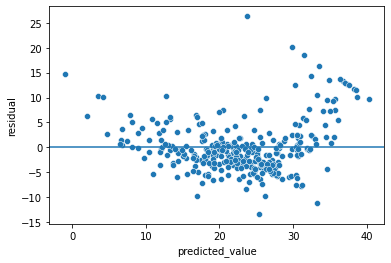

In [ ]:
# calculate residuals
residual = y_medv_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

1. linear relationship ? No because there's no linear line
2. variance konstan ? No because there's variety of residuals
3. residual independen ? No because there's no correlation

In [ ]:
# prepare prediction result on training data
y_predict_train = Lasso_best.predict(X_medv_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_medv_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_medv_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_medv_train, y_predict_train)))

RMSE for training data is 5.170346463296143
MAE for training data is 3.6858416211465084
MAPE for training data is 0.1749128202363825


From the result, we know that train data :

*   the spread of residuals from regression line is 5.170346463296143
*   mean absolute error of actual data to regression line is 3.6858416211465084
*   percentage of mean absolute error of actual data to regression line is 17.49%, which is good.





#5. Evaluate the best models on the test data (+ interpretation)

## Ridge

In [ ]:
# prepare prediction result on test data
X_medv_test = feature_medv_test.to_numpy()
y_predict_test = ridge_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test)))

RMSE for testing data is 5.1932794037692425
MAE for testing data is 3.350622665478779
MAPE for testing data is 0.18128875396393043


Before, we know that train data :

*   the spread of residuals from regression line is 4.679045708612578
*   mean absolute error of actual data to regression line is 3.3461317570037563
*   percentage of mean absolute error of actual data to regression line is 16,677%, which is good.


But from the result of test data 
*   the spread of residuals from regression line is 5.1932794037692425
*   mean absolute error of actual data to regression line is 3.350622665478779
*   percentage of mean absolute error of actual data to regression line is 18.128, which is good.






As the result of MAPE above we know that there's a acceptable for ridge model because  the percentage of error no significant different from 16,67% (in train data) become 18,128% (in test data)

## Lasso

In [ ]:
# prepare prediction result on test data
X_medv_test = feature_medv_test.to_numpy()
y_medv_test = Lasso_best.predict(X_medv_test)

# ground truth target
y_medv_test = target_medv_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_medv_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_medv_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_medv_test, y_predict_test)))

RMSE for testing data is 5.1932794037692425
MAE for testing data is 3.350622665478779
MAPE for testing data is 0.18128875396393043


before, we know that train data :

*   the spread of residuals from regression line is 5.170346463296143
*   mean absolute error of actual data to regression line is 3.6858416211465084
*   percentage of mean absolute error of actual data to regression line is 17.49%, which is good.

But from the result of test data 
*   the spread of residuals from regression line is 5.1932794037692425
*   mean absolute error of actual data to regression line is 3.350622665478779
*   percentage of mean absolute error of actual data to regression line is 18.128%, which is good.





As the result of MAPE above we know that there's a acceptable for Lasso model because  the percentage of error no significant different from 17,49% (in train data) become 18,128% (in test data)